In [22]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA
from sklearn.preprocessing import OrdinalEncoder
# import shap as shap



In [23]:
sys.path.append(r"C:/Users/gabri/Documents/Proyecto_ML_2025/src/utils/")

from Funciones import k_optimo

In [24]:
df = pd.read_csv('C:/Users/gabri/Documents/Proyecto_ML_2025/data/processed/super_shop_dataset_limpio_target.csv')

In [25]:
df.head()

,product_id,category,sub_category,brand,product_name,price,discount,final_price,stock,sold_quantity,...,customer_type,payment_method,transaction_id,order_status,delivery_time,return_status,employee_id,shift,feedback,Churn
0,P1000,Toys,Chairs,Nike,Item_D,2684,23,2066.68,192,21,...,Regular,Mobile Payment,T50000,Pending,2,Not Returned,801,Morning,Average,Churned
1,P1001,Clothing,Vegetables,Samsung,Item_A,2704,15,2298.40,21,62,...,Regular,Credit Card,T50001,Completed,12,Not Returned,173,Evening,Good,Retained
2,P1002,Toys,Vegetables,Apple,Item_C,3173,6,2982.62,66,11,...,New,Credit Card,T50002,Pending,7,Returned,974,Evening,Average,Churned
3,P1003,Furniture,Laptop,Sony,Item_D,4320,26,3196.80,180,9,...,VIP,Credit Card,T50003,Cancelled,13,Not Returned,206,Morning,Good,Churned
4,P1004,Furniture,Shirt,Samsung,Item_B,2557,34,1687.62,81,73,...,Regular,Mobile Payment,T50004,Pending,11,Returned,994,Evening,Good,Churned


In [26]:
le = LabelEncoder()

for col in df.select_dtypes('object'):
    df[col] = le.fit_transform(df[col])

In [27]:
df.head()

,product_id,category,sub_category,brand,product_name,price,discount,final_price,stock,sold_quantity,...,customer_type,payment_method,transaction_id,order_status,delivery_time,return_status,employee_id,shift,feedback,Churn
0,0,4,0,2,3,2684,23,2066.68,192,21,...,1,2,0,2,2,0,801,1,0,0
1,1,0,4,3,0,2704,15,2298.40,21,62,...,1,1,1,1,12,0,173,0,2,1
2,2,4,4,0,2,3173,6,2982.62,66,11,...,0,1,2,2,7,1,974,0,0,0
3,3,2,1,4,3,4320,26,3196.80,180,9,...,2,1,3,0,13,0,206,1,2,0
4,4,2,3,3,1,2557,34,1687.62,81,73,...,1,2,4,2,11,1,994,0,2,0


In [28]:
X = df.drop(['Churn'],axis=1) 
y = df['Churn']

In [29]:
scaler = MinMaxScaler()
X_escalada = scaler.fit_transform(X)

In [30]:
pca = PCA()
X_pca = pca.fit_transform(X_escalada)

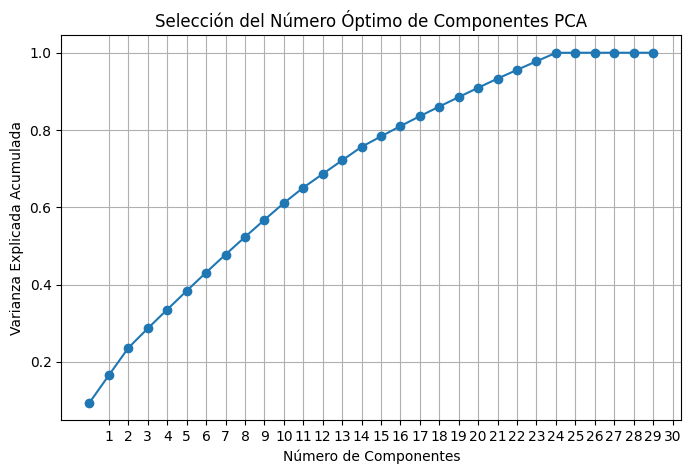

In [31]:
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("Selección del Número Óptimo de Componentes PCA")
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid()
plt.show()

In [32]:
pca = PCA(n_components=24)
X_pca = pca.fit_transform(X_escalada)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)


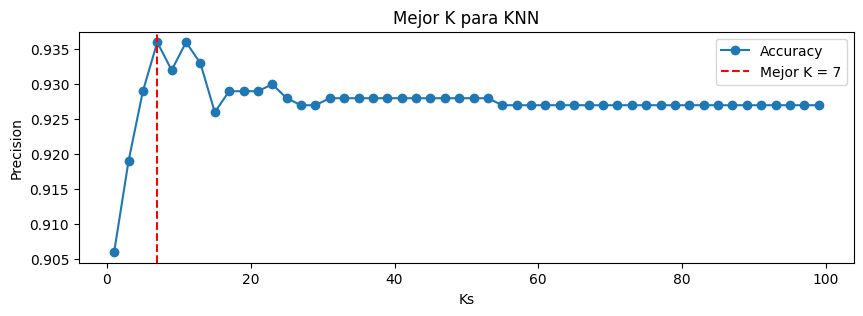

In [34]:
# usamos nuestra funcion para ver el mejor k
mejor_k, precision = k_optimo(X_train, y_train, X_test, y_test)

# Desempaquetamos nuestra tupla ya que la funcion devuelve una lista de tuplas 

k, accu = zip(*precision)

# graficamos 

plt.figure(figsize=(10, 3))
plt.plot(k,accu, marker='o', label='Accuracy')
plt.axvline(mejor_k[0], linestyle='--',color='r', label=f'Mejor K = {mejor_k[0]}')

plt.xlabel('Ks')
plt.ylabel('Precision')
plt.title('Mejor K para KNN')
plt.legend()
plt.show()

In [38]:
# Entrenamos nuestro modelo con k = 57 que fue el mejor resultado de nuestra prueba 

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [36]:
# predecimos

y_pred = knn.predict(X_test)

In [37]:
# Vemos la precision

print(f'Precision : {accuracy_score(y_test, y_pred)}')

Precision : 0.919
